# Accessing and using BARRA2 and BARPA data for research

- Brief intro
- Some pictures?
- Links to papers/reports

### BARRA2

Bureau of Meteorology Atmospheric high-resolution Regional Reanalysis for 
Australia - Version 2 (BARRA2) is a reanalysis from 1979 to the present day covering Australia, New Zealand and a portion of South-East Asia.

### BARPA

The Bureau of Meteorology Atmospheric Regional Projections for Australia (BARPA) delivers high-resolution dynamical downscaling of CMIP6 experiments over CORDEX-Australasia and Australian domains.

#### Publications
- Su, C. H., Rennie, S., Dharssi, I., Torrance, J., Smith, A., Le, T., Steinle, P., Stassen, C., Warren, R. A., Wang, C., &#38; le Marshall, J. (2022). *BARRA2: Development of the next-generation Australian regional atmospheric reanalysis*. http://www.bom.gov.au/research/publications/researchreports/BRR-067.pdf
- Su, C. H., Rennie, S., Torrance, J., Dharssi, I., Tian, S., Howard, E., Pepler, A., Stassen, C., &#38; Steinle, P. (2023). *Preliminary assessment of regional moderate-resolution atmospheric reanalysis for Australia*. http://www.bom.gov.au/research/publications/researchreports/BRR-084.pdf

- Su, C.H., Stassen, C., Howard, E., Ye, H., Bell, S., 
Peple, A.r1 Dowd, A. J.y1 Tucke, S.r2 Frankli, C.1(2022). BARPA: New development of ACCESS-based regional 
climate modelling for Australian Climate Services*http://www.bom.gov.au/research/publications/researchreports/BRR-069.pdfdf
- Howard, E., Su, C.-H., Stassen, C., Naha, R., Ye, H., Pepler, A., Bell, S. S., Dowdy, A. J., Tucker, S. O., and Franklin, C.: Performance and process-based evaluation of the BARPA-R Australasian regional climate model version 1, Geosci. Model Dev. Discuss. [preprint], https://doi.org/10.5194/gmd-2023-156, in review, 202
- Stassen, C., Su, C.H., A., Dowdy, Franklin, C., Howard, E., Steinle, P.(2023). *Development and Assessment of Regional 
Atmospheric Nudging in ACCESS*.http://www.bom.gov.au/research/publications/researchreports/BRR-086.pdff3.

### Access BARRA2 & BARPA

The outputs for BARRA2 and BARPA are store at NCI in the ob53 and py18 projects respectively.
Access to these projects can be requested in the usual way at the NCI account management pages - https://my.nci.org.au/mancini
The datafiles are also available for direct download from NCI's Thredds server:
- [BARRA2](https://dap.nci.org.au/thredds/remoteCatalogService?catalog=https://dapds00.nci.org.au/thredds/catalogs/ob53/catalog.xml)
- [BARPA](https://dap.nci.org.au/thredds/remoteCatalogService?catalog=https://dapds00.nci.org.au/thredds/catalogs/py18/catalog.xml)

#### List of variables

#### Directory structure at NCI


### Loading BARRA/BARPA data with Xarray & Dask

In [1]:
# Imports for the whole notebook
# TODO: separate these out to the minimum necessary per section?
import os
from glob import glob
import xarray as xr
import pandas
from matplotlib import pyplot as plt
import cartopy.crs
from dask.distributed import Client, LocalCluster

In [2]:
# Let's explictly load dask so we can check progress
# Copy and past the dashboard link/path from this cell's output
# to the Dask tab on the left.
cluster = LocalCluster()
client = Client(cluster)
client

/opt/conda/envs/datasci/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33545 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/33545/status,
Dashboard: /proxy/33545/status,Workers: 7
Total threads: 7,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44435,Workers: 7
Dashboard: /proxy/33545/status,Total threads: 7
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:34307,Total threads: 1
Dashboard: /proxy/35959/status,Memory: 4.57 GiB
Nanny: tcp://127.0.0.1:40979,


In [3]:
## Data location
# Let's define the path to the file we're interested in
barra_r2_root_path = "/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1"

barpa_model = "/g/data/py18/BARPA/output/CMIP6/DD/AUS-15/BOM"
barpa_model = "PUT EXAMPLE MODEL HERE"
barpa_root_path = f"{barpa_model}/{barpa_model}/..."

# TODO : default to BARPA?

# Pick the root path that interests you
root_path = barra_r2_root_path
#root_path = barpa_something_root_path

## Time resolution
# e.g. BARRA - mon, day, 3hr, 1hr
#      BARPA - mon, day, 6hr, 1hr
time_resolution = "1hr"

## Variable
# see X TODO: Find useable list of vars
var = "ts"

## Date (YYYYMM)
# With glob we can use wild cards to find the files we want
# e.g. "2007??" for all of 2007 or "20070[123]" for the first three months
date = "20071?"

# Build a string to use with glob
glob_str = os.path.join(root_path, time_resolution, var, "*", f"*{date}.nc")
file_list = sorted(glob(glob_str))

In [4]:
# Open the dataset

# If we have a single file we can use open_dataset
#ds = xr.open_dataset(file_list[0])

# If we have a list of files we use open_mfdataset
ds = xr.open_mfdataset(file_list, parallel=True)

In [5]:
ds

<xarray.Dataset>
Dimensions:  (time: 2208, lat: 646, lon: 1082)
Coordinates:
  * time     (time) datetime64[ns] 2007-10-01 ... 2007-12-31T23:00:00
  * lat      (lat) float64 -57.97 -57.86 -57.75 -57.64 ... 12.76 12.87 12.98
  * lon      (lon) float64 88.48 88.59 88.7 88.81 ... 207.1 207.2 207.3 207.4
Data variables:
    ts       (time, lat, lon) float64 dask.array<chunksize=(744, 646, 1082), meta=np.ndarray>
Attributes: (12/56)
    axiom_version:             0.1.0
    axiom_schemas_version:     0.1.0
    axiom_schema:              cordex-1H.json
    Conventions:               CF-1.10, ACDD-1.3
    activity_id:               reanalysis
    source:                    Data from Met Office Unified Model (UM) and Jo...
    ...                        ...
    creator_institution:       Bureau of Meteorology
    keywords:                  Earth Science Services, Models, EARTH SCIENCE ...
    title:                     Bureau of Meteorology Atmospheric high-resolut...
    summary:                   The Bureau of Meteorology Atmospheric high-res...
    date_modified:             2023-11-17T02:07:25Z
    date_metadata_modified:    2023-11-17T02:07:25Z

In [6]:
ds[var].attrs

{'long_name': 'Surface Temperature',
 'standard_name': 'surface_temperature',
 'units': 'K',
 'cell_methods': 'time: point (interval: 1H)'}

#### Exercise
1. Edit the paths above to load a years worth of data.
2. Pick your favourite variable and load the dataset for it.

#### TODO: discusss instantaneous vs. accumulated variables
- bundling data sets together is a trap

In [7]:
# TODO: Is there a better way to do this?
# Jupyter notebooks typically don't run from the file's location
# So we need to change the working directory

# Change notebook working directory to the location of the notebook
# Update the following to the directory containing the notebook file
notebook_dir = "/home/548/jt4085/repos/BARRA2_evaluation/jt/notebooks"
os.chdir(notebook_dir)

In [8]:
from loaddata import load_dataset

In [9]:
ds = load_dataset('ts', '1hr', '199910', 'barra')
ds

<xarray.Dataset>
Dimensions:    (time: 1, lat: 646, lon: 1082, bnds: 2)
Coordinates:
  * lat        (lat) float64 -57.97 -57.86 -57.75 -57.64 ... 12.76 12.87 12.98
  * lon        (lon) float64 88.48 88.59 88.7 88.81 ... 207.1 207.2 207.3 207.4
  * time       (time) datetime64[ns] 1999-10-16T12:00:00
Dimensions without coordinates: bnds
Data variables:
    ts         (time, lat, lon) float64 dask.array<chunksize=(1, 646, 1082), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/56)
    axiom_version:             0.1.0
    axiom_schemas_version:     0.1.0
    axiom_schema:              cordex-1M.json
    productive_version:        f5a7b55
    Conventions:               CF-1.10, ACDD-1.3
    activity_id:               reanalysis
    ...                        ...
    history:                   Wed Oct 04 23:23:43 2023: /g/data/access/ngm/m...
    references:                https://doi.org/10.25914/1x6g-2v48
    license:                   https://doi.org/10.25914/1x6g-2v48
    acknowledgement:           The production of BARRA2 was supported with fu...
    date_modified:             2023-11-17T01:59:21Z
    date_metadata_modified:    2023-11-17T01:59:21Z

### Indexing and Plotting Data
Xarray has sophisticated indexing tools available.
There are many ways to index data with Xarray, below are a couple of ways.

See Xarray's [documentation](https://docs.xarray.dev/en/latest/user-guide/indexing.html) for more details.

Xarray data sets can be easily plotting with matplotlib.

#### First timestep

In [10]:
# Select the first timestep
ds_first_timestep = ds.isel(time=0)

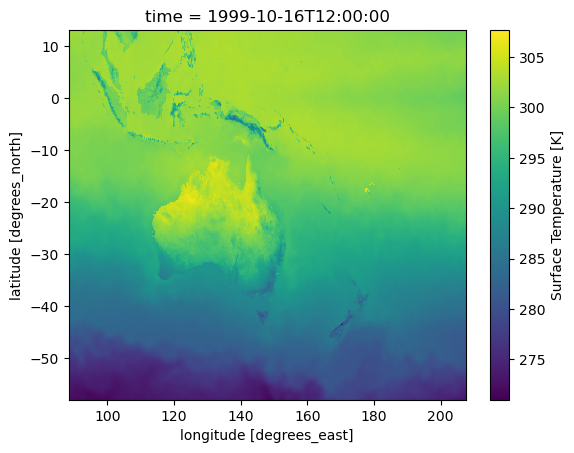

In [11]:
# Plot the first field

# Can only plot data arrays (not datasets)
da = ds_first_timestep[var]
da.plot()

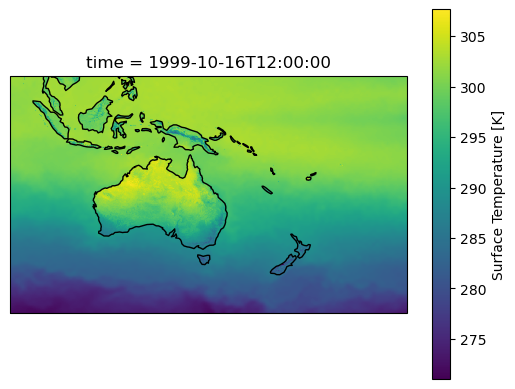

In [12]:
# Plot the first field - with coastlines!

# Can only plot data arrays (not datasets)
da = ds_first_timestep[var]

# Build a cartopy projection so we can draw on the coastlines
centre_lon = da['lon'].mean().values
projection = cartopy.crs.PlateCarree(central_longitude=centre_lon)

# Now plot the field with the transform.
p = da.plot(
    transform=cartopy.crs.PlateCarree(),
    subplot_kws={"projection": projection, "facecolor": "gray"})

# Draw the coastlines using cartopy
p.axes.coastlines()

#### Zoom in on Melbourne

In [13]:
# Select the Melbourne region with slice
melb_lat, melb_lon = -37.840935, 144.946457
width = 0.75
ds_melb = ds.sel(lat=slice(melb_lat - width, melb_lat + width),
                 lon=slice(melb_lon - width, melb_lon + width))

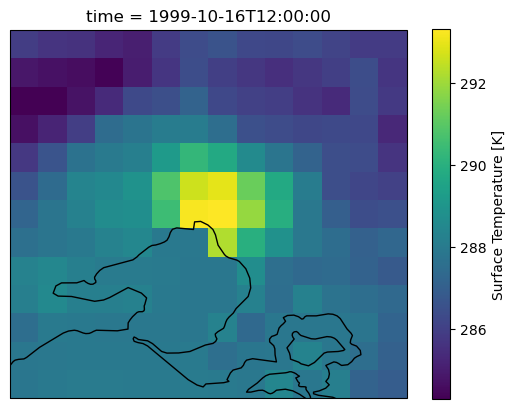

In [14]:
da = ds_melb.isel(time=0)[var]
centre_lon = da['lon'].mean().values
projection = cartopy.crs.PlateCarree(central_longitude=centre_lon)
p = da.plot(
    transform=cartopy.crs.PlateCarree(),
    subplot_kws={"projection": projection, "facecolor": "gray"})
p.axes.coastlines()

#### Mean temperature in Melbourne in 2007

In [15]:
ds_melb[var].mean(dim=['lat', 'lon'])#.plot()


#plt.title(f"Mean {da.attrs['long_name']} in Melbourne region ({da.attrs['units']})")

<xarray.DataArray 'ts' (time: 1)>
dask.array<mean_agg-aggregate, shape=(1,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1999-10-16T12:00:00

#### Exercise
1. Plot the average temperature in Melbourne by time-of-day
2. Plot the min and max daily temperatures in Melbourne

In [16]:
# Let's get the local Melb time as we'll need it soon
# Add the timezone, convert it to Melb, remove the timezone
time_melb = pandas.to_datetime(ds_melb['time']).tz_localize('UTC').tz_convert('Australia/Melbourne').tz_localize(None)

# And add it back into the Dataset as a new coordinate
ds_melb = ds_melb.assign_coords(time_melb=("time", time_melb))

In [19]:
ds_melb

<xarray.Dataset>
Dimensions:    (time: 1, lat: 13, lon: 14, bnds: 2)
Coordinates:
  * lat        (lat) float64 -38.5 -38.39 -38.28 -38.17 ... -37.4 -37.29 -37.18
  * lon        (lon) float64 144.2 144.4 144.5 144.6 ... 145.3 145.5 145.6 145.7
  * time       (time) datetime64[ns] 1999-10-16T12:00:00
    time_melb  (time) datetime64[ns] 1999-10-16T22:00:00
Dimensions without coordinates: bnds
Data variables:
    ts         (time, lat, lon) float64 dask.array<chunksize=(1, 13, 14), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/56)
    axiom_version:             0.1.0
    axiom_schemas_version:     0.1.0
    axiom_schema:              cordex-1M.json
    productive_version:        f5a7b55
    Conventions:               CF-1.10, ACDD-1.3
    activity_id:               reanalysis
    ...                        ...
    history:                   Wed Oct 04 23:23:43 2023: /g/data/access/ngm/m...
    references:                https://doi.org/10.25914/1x6g-2v48
    license:                   https://doi.org/10.25914/1x6g-2v48
    acknowledgement:           The production of BARRA2 was supported with fu...
    date_modified:             2023-11-17T01:59:21Z
    date_metadata_modified:    2023-11-17T01:59:21Z

In [17]:
# Now plot the mean field value, averaged over each hour of the day
ds_melb[var].mean(dim=['lat', 'lon']).groupby("time_melb.hour").mean().plot()

TypeError: No numeric data to plot.

In [20]:
# Daily min and max is usually from 9am to 9am
# Offset to 9am
# Let's continue taking the field mean to give an indicative daily max value for Melb
ds_melb.resample({'time_melb': '1D'}, offset='+9H').max().mean(dim=['lat', 'lon'])[var].plot()
ds_melb.resample({'time_melb': '1D'}, offset='+9H').min().mean(dim=['lat', 'lon'])[var].plot()
ds_melb.mean(dim=['lat', 'lon'])[var].plot(alpha=0.6)

KeyError: 'time_melb'